## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt


#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = application_df.drop(columns=['EIN', 'NAME'])

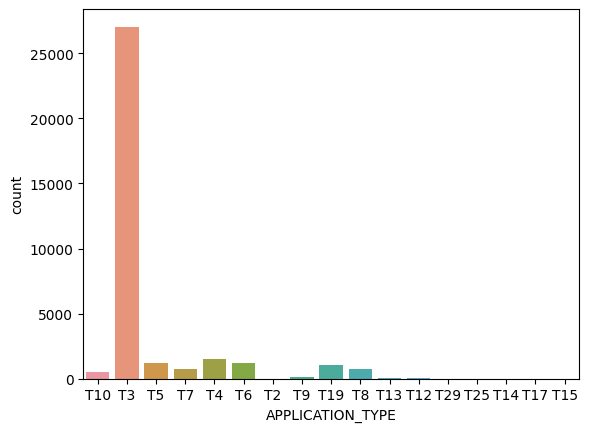

In [3]:
# Bar Plot, data analysis
sns.countplot(data=df, x='APPLICATION_TYPE')
plt.show()


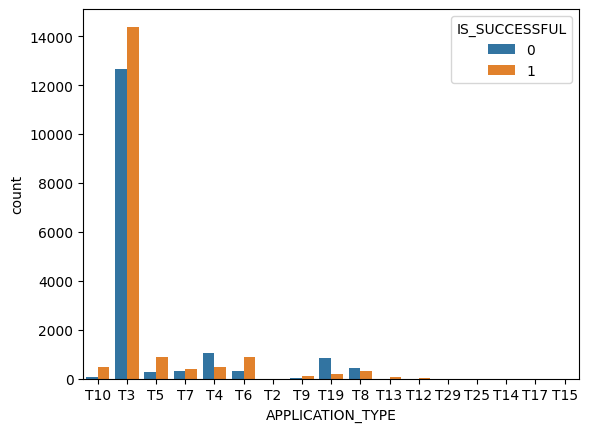

In [4]:
# Count Plot with Hue, data analysis
sns.countplot(data=df, x='APPLICATION_TYPE', hue='IS_SUCCESSFUL')
plt.show()


In [5]:
# Determine the number of unique values in each column.
unique_counts = df.nunique()
print(unique_counts)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [6]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts = df['APPLICATION_TYPE'].value_counts()
print(app_type_counts)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_counts[app_type_counts < 10000].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
Other     7262
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
print(classification_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64


In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts_gt1 = classification_counts[classification_counts > 1]
print(classification_counts_gt1)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64


In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#adjust counts to less than 75 to see if it helps accuracy
classifications_to_replace = list(classification_counts[classification_counts < 75].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      499
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
Name: CLASSIFICATION, dtype: int64

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
application_encoded = pd.get_dummies(df, columns=["APPLICATION_TYPE", "AFFILIATION", "CLASSIFICATION", "USE_CASE", "ORGANIZATION", "INCOME_AMT", "SPECIAL_CONSIDERATIONS"])

In [12]:
application_encoded

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_encoded["IS_SUCCESSFUL"].values
X = application_encoded.drop("IS_SUCCESSFUL", 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

<ipython-input-13-40dd3ad7175d>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = application_encoded.drop("IS_SUCCESSFUL", 1).values


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
print(X_train_scaled.shape)


(25724, 116)


## Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#dropout_rate = 0.2

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=X_train_scaled.shape[1]))
#nn.add(tf.keras.layers.Dropout(dropout_rate))  # Add dropout after the layer

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))
#nn.add(tf.keras.layers.Dropout(dropout_rate))  # Add dropout after the layer

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                9360      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 11,821
Trainable params: 11,821
Non-trainable params: 0
_________________________________________________________________


Test Notes:
-units 80, units 30, units 1 (1, 2, 3) = accu 74%

-units 100, units 50, units 1 (1, 2, 3) = accu 73%

-nn.add(tf.keras.layers.Dense(units=30, activation="tanh")) #tahn has less accuracy that relu

-adding a third layer produced worse accuracy #nn.add(tf.keras.layers.Dense(units=15, activation="relu"))

-changing optimizers gave worse results: optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001), nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

-for this bit: use the variable name `classifications_to_replace`, adjust counts to less than 75 to see if it helps accuracy (it doesnt)



In [17]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [18]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=100)
fit_model = nn.fit(X_train_scaled, y_train, epochs=200, validation_split=0.1, callbacks=[early_stopping])
#fit_model = nn.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/200
724/724 [==============================] - 8s 6ms/step - loss: 0.5784 - accuracy: 0.7147 - val_loss: 0.5461 - val_accuracy: 0.7443
Epoch 2/200
724/724 [==============================] - 5s 7ms/step - loss: 0.5534 - accuracy: 0.7282 - val_loss: 0.5527 - val_accuracy: 0.7353
Epoch 3/200
724/724 [==============================] - 6s 8ms/step - loss: 0.5515 - accuracy: 0.7279 - val_loss: 0.5523 - val_accuracy: 0.7392
Epoch 4/200
724/724 [==============================] - 3s 4ms/step - loss: 0.5488 - accuracy: 0.7311 - val_loss: 0.5592 - val_accuracy: 0.7314
Epoch 5/200
724/724 [==============================] - 2s 2ms/step - loss: 0.5475 - accuracy: 0.7305 - val_loss: 0.5507 - val_accuracy: 0.7400
Epoch 6/200
724/724 [==============================] - 2s 2ms/step - loss: 0.5463 - accuracy: 0.7325 - val_loss: 0.5477 - val_accuracy: 0.7419
Epoch 7/200
724/724 [==============================] - 2s 3ms/step - loss: 0.5452 - accuracy: 0.7299 - val_loss: 0.5538 - val_accuracy: 0.7377

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5740 - accuracy: 0.7296 - 372ms/epoch - 1ms/step
Loss: 0.5739825367927551, Accuracy: 0.7295626997947693


In [20]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

